# CNN Test
 - This notebook tests the subspecies and health cnn on images of honey bees taken by the notebook's author.

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
import tensorflow as tf
from tensorflow import keras
import imageio
import skimage
import skimage.io
import skimage.transform
from PIL import Image

### Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pwd

/content


#### Create Temporary Directory for RGB Conversions

In [4]:
!mkdir rgbimg

In [5]:
IMAGE_PATH = '/content/drive/MyDrive/Capstone/data/bee_imgs/'
TEST_IMAGE_PATH = '/content/drive/MyDrive/Capstone/data/test_bee_img/'
TEMP_PATH = '/content/rgbimg/'
IMAGE_WIDTH = 100
IMAGE_HEIGHT = 100
IMAGE_CHANNELS = 3
RANDOM_STATE = 42
TEST_SIZE = 0.2
VAL_SIZE = 0.2
CONV_2D_DIM_1 = 16
CONV_2D_DIM_2 = 16
CONV_2D_DIM_3 = 32
CONV_2D_DIM_4 = 64
MAX_POOL_DIM = 2
KERNEL_SIZE = 3
BATCH_SIZE = 32
PATIENCE = 5
NO_EPOCHS_1 = 5
NO_EPOCHS_2 = 10
NO_EPOCHS_3 = 50

### Load the Trained Keras Models

In [6]:
model_subspecies = keras.models.load_model('/content/drive/MyDrive/Capstone/models/model_lr_species/')
model_health = keras.models.load_model('/content/drive/MyDrive/Capstone/models/model_lr_health/')
model_subspecies_bal = keras.models.load_model('/content/drive/MyDrive/Capstone/models/model_lr_subspecies_bal/')
model_health_bal = keras.models.load_model('/content/drive/MyDrive/Capstone/models/model_lr_health_bal/')

In [7]:
# Function to read image sizes
def read_image_sizes(file_name):
    image = skimage.io.imread(TEST_IMAGE_PATH + file_name)
    return list(image.shape)

In [8]:
# Function to read an RGB converted image
def read_rgb_image(file_name):
    image = skimage.io.imread(TEMP_PATH + file_name)
    image = skimage.transform.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT), mode='reflect')
    return image[:,:,:IMAGE_CHANNELS]

#### Examine Filenames and sizes

In [9]:
filenames = os.listdir(TEST_IMAGE_PATH)

In [10]:
filenames[:10]

['image1.png',
 'image2.png',
 'image3.png',
 'image4.png',
 'image5.png',
 'image6.png',
 'image7.png',
 'image8.png',
 'image9.png',
 'image10.png']

In [11]:
[read_image_sizes(i) for i in filenames[:10]]

[[310, 282, 4],
 [502, 438, 4],
 [202, 266, 4],
 [252, 184, 4],
 [142, 122, 4],
 [262, 202, 4],
 [350, 248, 4],
 [314, 214, 4],
 [286, 210, 4],
 [208, 362, 4]]

### Example Image

In [12]:
image = Image.open(TEST_IMAGE_PATH + 'image1.png')

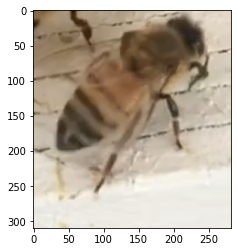

In [13]:
plt.imshow(image);

In [14]:
image.mode

'RGBA'

This image is in an RGB(A) format, but the CNNs will take in images of the RGB format. The image will be converted to RGB and saved to a temporary path.

In [15]:
rgb_image = image.convert('RGB')

In [16]:
rgb_image.save(TEMP_PATH+ 'image1.png')

In [17]:
read_image_sizes('image1.png')

[310, 282, 4]

In [22]:
X = np.stack(read_rgb_image('image1.png'))

In [23]:
X.shape

(100, 100, 3)

The image data must be reshaped into 4 dimensions in order to be passed into the CNN.

In [24]:
X = X.reshape(1,X.shape[0],X.shape[1],X.shape[2])

In [25]:
X.shape

(1, 100, 100, 3)

In [26]:
model_subspecies.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 50, 50, 16)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 50, 50, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 16)        2320      
                                                                 
 dropout_3 (Dropout)         (None, 50, 50, 16)        0         
                                                                 
 flatten_2 (Flatten)         (None, 40000)             0         
                                                      

In [27]:
model_health.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 50, 50, 16)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 50, 50, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 16)        2320      
                                                                 
 dropout_3 (Dropout)         (None, 50, 50, 16)        0         
                                                                 
 flatten_2 (Flatten)         (None, 40000)             0         
                                                      

In [28]:
model_subspecies_bal.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 50, 50, 16)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 50, 50, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 16)        2320      
                                                                 
 dropout_3 (Dropout)         (None, 50, 50, 16)        0         
                                                                 
 flatten_2 (Flatten)         (None, 40000)             0         
                                                      

In [29]:
model_health_bal.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 50, 50, 16)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 50, 50, 16)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 50, 50, 16)        2320      
                                                                 
 dropout_9 (Dropout)         (None, 50, 50, 16)        0         
                                                                 
 flatten_6 (Flatten)         (None, 40000)             0         
                                                      

### Target Labels

In [30]:
pred_species_labels = ['Unknown', '1 Mixed local stock 2', 'Carniolan honey bee',
       'Italian honey bee', 'Russian honey bee', 'VSH Italian honey bee',
       'Western honey bee']

In [31]:
pred_health_labels = ["Varroa", "Small Hive Beetles", "Ant Problems", "Few Varroa", "Hive Beetles, Healthy" , "Hive Being Robbed", "Missing Queen"]

In [34]:
bee_df = pd.read_csv('/content/drive/MyDrive/Capstone/data/bee_data_w_image.csv')

In [35]:
bee_df.file[:5]

0    041_066.png
1    041_072.png
2    041_073.png
3    041_067.png
4    041_059.png
Name: file, dtype: object

### Plotting Random Images
 - Random images from the self-collected testing image directory are selected and displayed, with their predicted subspecies and healths status

1/1 [==============================] - 0s 15ms/step
File image10.png, picture 1
For this file, the species is VSH Italian honey bee and the likely health quality is Small Hive Beetles.
For this file, taking into account the frequency of Italian Honey Bees and Healthy Bees, the species is VSH Italian honey bee and the likely health quality is Few Varroa.
1/1 [==============================] - 0s 16ms/step
File image8.png, picture 2
For this file, the species is Italian honey bee and the likely health quality is Small Hive Beetles.
For this file, taking into account the frequency of Italian Honey Bees and Healthy Bees, the species is Carniolan honey bee and the likely health quality is Few Varroa.
1/1 [==============================] - 0s 15ms/step
File image5.png, picture 3
For this file, the species is Italian honey bee and the likely health quality is Few Varroa.
For this file, taking into account the frequency of Italian Honey Bees and Healthy Bees, the species is Unknown and the lik

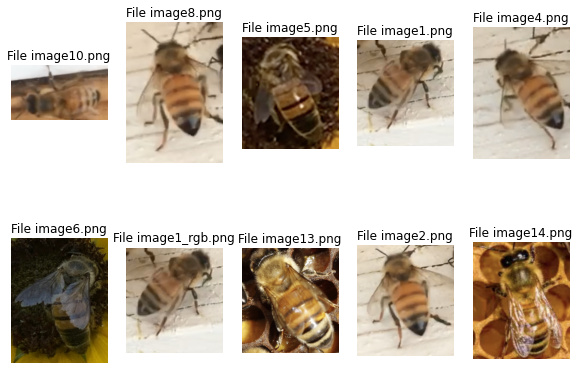

In [37]:
# Choosing and plotting random test images and predicting health and subspecies
# with balanced adn unbalanced models.


fig = plt.figure(figsize=(10, 7))
i = 1
rand_size = 10
rows = 2
columns = 5

for n in np.random.choice([i for i in range(len(filenames))], size = rand_size, replace = False):
    
    f = filenames[n]
    image = Image.open(TEST_IMAGE_PATH + f)
    rgb_image = image.convert('RGB')
    rgb_image.save(TEMP_PATH+ f)
    
      
    # Adds a subplot at the 1st position
    fig.add_subplot(rows, columns, i)
      
    # showing image
    plt.imshow(image)
    plt.axis('off')
    plt.title(f'File {f}')
    i+=1

    X = np.stack(read_rgb_image(f))
    X = X.reshape(1,X.shape[0],X.shape[1],X.shape[2])
    preds_subspecies = model_subspecies.predict(X)
    preds_health = model_health.predict(X)
    preds_subspecies_bal = model_subspecies_bal.predict(X)
    preds_health_bal = model_health_bal.predict(X)

    preds_species_bal_index = int(np.argmax(preds_subspecies_bal, axis = 1))
    p_s_b = pred_species_labels[preds_species_bal_index]

    pred_species_index = int(np.argmax(preds_subspecies, axis = 1))
    p_s = pred_species_labels[pred_species_index]

    preds_health_index = int(np.argmax(preds_health, axis = 1))
    p_h = pred_health_labels[preds_health_index]

    preds_health_bal_index = int(np.argmax(preds_health_bal, axis = 1))
    p_h_b = pred_health_labels[preds_health_bal_index]

    print(f'File {f}, picture {i-1}')
    print(f'For this file, the species is {p_s}'+ f' and the likely health quality is {p_h}.')
    print(f'For this file, taking into account the frequency of Italian Honey Bees and Healthy Bees, the species is {p_s_b}'+ f' and the likely health quality is {p_h_b}.')

This implementation of prediction a user-provided image will be modified and incorporated into a Streamlit Web App.